## Importar librerías necesarias

In [1]:
from netCDF4 import Dataset          # Read / Write NetCDF4 files
import matplotlib.pyplot as plt      # Plotting library
from datetime import datetime        # Basic Dates and time types
import cartopy, cartopy.crs as ccrs  # Plot maps

## Leer el archivo netCDF

In [2]:
file = Dataset('data/OR_ABI-L2-CMIPF-M6C13_G16_s20223041800203_e20223041809522_c20223041810015.nc') # Este

#file = Dataset('data/OR_ABI-L2-CMIPF-M6C13_G17_s20223000000319_e20223000009396_c20223000009474.nc') # Oeste

Convertimos los de Kelvin para Celsus

In [3]:
data = file.variables['CMI'][:] - 273.15

## Recuperamos los parámetros geográficos

In [4]:
longitude_of_projection_origin = file.variables['goes_imager_projection'].longitude_of_projection_origin
perspective_point_height = file.variables['goes_imager_projection'].perspective_point_height

print(longitude_of_projection_origin)
print(perspective_point_height)

-75.0
35786023.0


## Recuperamos los límites que visualiza el satélite

In [5]:
# Extent of data in decimais (2712*0.000056*35786023.0)
xmin = file.variables['x'][:].min()*perspective_point_height
xmax = file.variables['x'][:].max()*perspective_point_height
ymin = file.variables['y'][:].min()*perspective_point_height
ymax = file.variables['y'][:].max()*perspective_point_height
img_extent = (xmin, xmax, ymin, ymax)
print(img_extent)

(-5433892.69232443, 5433892.69232443, -5433892.69232443, 5433892.69232443)


## Finalmente hacemos nuestra figura

Text(0.0, 1.0, 'GOES-16 Band 13 2022-10-31 18:00 UTC')

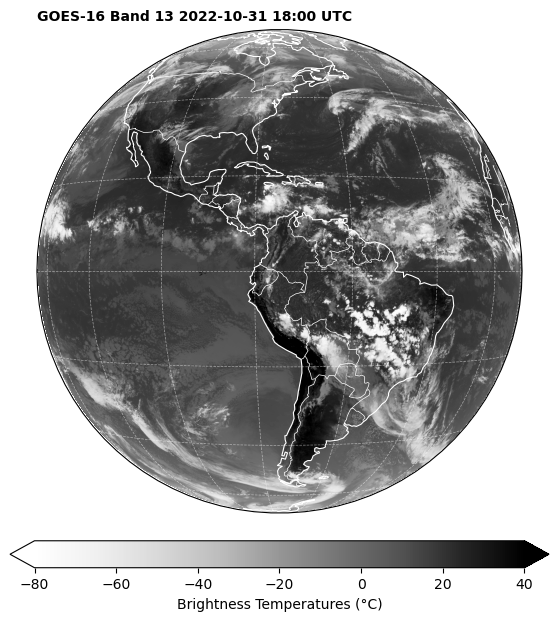

In [6]:
# Elijamos el tamaño de la figura (ancho x alto, en pulgadas)
plt.figure(figsize=(7,7))
 
# Usamos la proyección geoestacionaria en cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude_of_projection_origin, satellite_height=perspective_point_height))
 
# Agregar líneas de costa, bordes y líneas de cuadrícula
ax.coastlines(color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Agregamos la matriz de datos
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')

# Agregamos la barra de colores
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extraemos la fecha
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Agregamos el titulo
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')

## Retornar al [indice](./../indice.md)